**Experiment 12**

Using CNN for Image ClassificatioN

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Flatten, Dense
from keras.datasets import cifar10

Loading Cifar-10 dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 136s 1us/step


Using ImageDataGenerator for Real-time data augmentation

In [5]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range = 30, rescale = 1./255)
train_gen = img_gen.flow(x_train, y_train, batch_size = 32)
test_gen = img_gen.flow(x_test, y_test)

Building a CNN Model for Image Classification

In [6]:
model = models.Sequential()
# Todo
#Your input is of  32 x 32 x 3 dimensions
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


2022-11-27 23:17:39.764718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = x_train.shape[0] // 32
r = model.fit(train_gen, steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen, epochs = 20)

Epoch 1/20
1562/1562 [==============================] - 90s 57ms/step - loss: 1.4347 - accuracy: 0.0952 - val_loss: 1.4114 - val_accuracy: 0.0615
Epoch 2/20
1562/1562 [==============================] - 84s 53ms/step - loss: 1.0990 - accuracy: 0.0995 - val_loss: 1.1036 - val_accuracy: 0.0762
Epoch 3/20
1562/1562 [==============================] - 83s 53ms/step - loss: 0.9560 - accuracy: 0.1016 - val_loss: 0.9793 - val_accuracy: 0.0792
Epoch 4/20
1562/1562 [==============================] - 82s 53ms/step - loss: 0.8802 - accuracy: 0.1010 - val_loss: 0.9607 - val_accuracy: 0.0888
Epoch 5/20
1562/1562 [==============================] - 83s 53ms/step - loss: 0.8190 - accuracy: 0.1019 - val_loss: 0.8964 - val_accuracy: 0.1066
Epoch 6/20
1562/1562 [==============================] - 82s 53ms/step - loss: 0.7605 - accuracy: 0.1015 - val_loss: 1.0077 - val_accuracy: 0.1138
Epoch 7/20
1562/1562 [==============================] - 83s 53ms/step - loss: 0.7286 - accuracy: 0.1020 - val_loss: 0.7795 -

In [9]:
model.evaluate(test_gen)

313/313 [==============================] - 8s 24ms/step - loss: 0.6962 - accuracy: 0.0924


[0.696179986000061, 0.09239999949932098]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [11]:
#Save your model
model.save('PES1UG20CS345.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

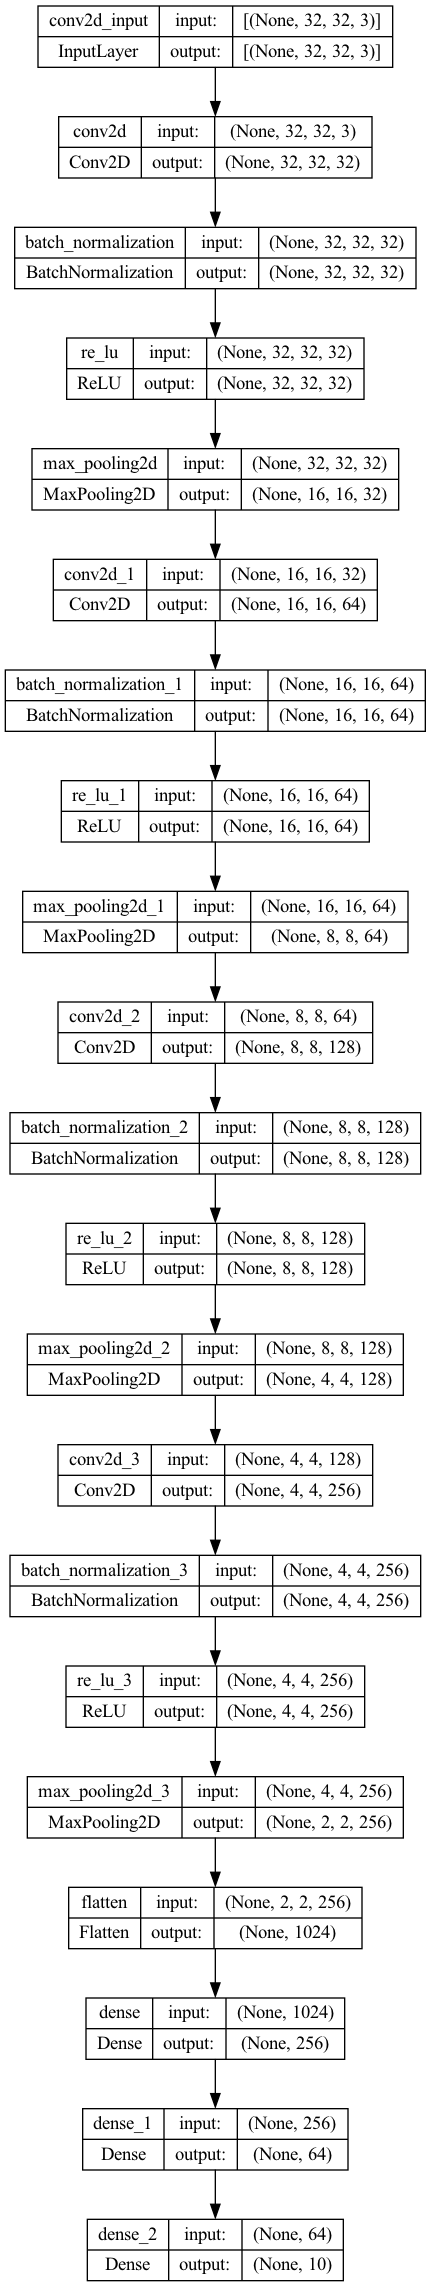

In [15]:
#For your Verification Purposes:
model_n=tf.keras.models.load_model('PES1UG20CS345.h5') # "SRN.h5"
model_n.summary()

#Verify your model using this i.e ,if the Image generated after this matches the Flow chart Image in PDF file then your output is most likely correct
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)